---
title: Plane Waves and Math Review - Homework 01
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

This is the first homework assignment for *Lasers and Optomechanics* at Syracuse University.

<span style="color:#ff5555;">**It is due 5pm on Friday, January 23, 2026**</span>

**You will need to complete the questions in this jupyter notebook and submit it via your `git` repo**


In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('dark_background')

fontsize = 14

mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        #"figure.autolayout": True,
        #font.family": "serif",
        #"font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)


**<span style="color:#ffaaff;">Approximations Review</span>**

In this course, you will need to remember and use some basic approximations.\
These approximations all come from taking the [*Taylor Expansion*](https://en.wikipedia.org/wiki/Taylor_series) of a function $f(x)$ about some point $x = a$:
$$f(x)\Bigr|_{x \rightarrow a} \approx f(a) + f'(a) (x-a) + \dfrac{1}{2!} f''(a) (x-a)^2 = \displaystyle \sum_{n=0}^\infty \dfrac{f^{(n)}(a)}{n!}(x - a)^n$$


# <span style="color: #ff5500">Question 1: Binomial Approximation</a>
The binomial approximation to first order in $x$ is as follows:
\begin{align}
(1 + x)^{n} \approx 1 + n x.
\end{align}

## <span style="color:#ccccff;">Question 1A</span>
Derive the binomial approximation using the Taylor Expansion to first order about $x = 0$

if $f(x) = (1+x)^{n}$ then $f'(x) = n(1+x)^{n-1}$

So $f'(0) = n*1^{n-1} = n$ and $f(0) = 1$

therfore $f(x) \approx 1+nx$
## <span style="color:#ccccff;">Question 1B</span>
Find the second and third order terms of the binomial approximation

$f''(x) = n(n-1)(1+x)^{n-2}$ and $f'''(x) = n(n-1)(n-2)(1+x)^{n-3}$

so $f''(0) = n(n-1)$ and $f'''(x) = n(n-1)(n-2)$

and the taylor expansion becomes $f(x) \approx 1+nx+\frac{n(n-1)x^2}{2}+\frac{n(n-1)(n-2)x^3}{6}$

## <span style="color:#ccccff;">Question 1C</span>
Plot the binomial function on $x \in [-1, 1]$ for $n = \dfrac{1}{2}$.\
Compare to plots of the first, second, and third order binomial approximation.\
At what $x > 0$ does each approximation fail, becoming greater than 5\% error?

## Question 1A Solution: <span style="color:#ff5555;">(This example filled out for you)</span>
Let $$f(x) = (1 + x)^n,$$ 
then at $x = 0$, $$f(0) = 1.$$
Then the first derivative $f'(x)$ is $$f'(x) = n (1 + x)^{n-1}$$
and the derivative evaluated at $x = 0$ is $$f'(0) = n$$

The Taylor Expansion to first order then becomes 
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x\\~\\
&= 1 + n x
\end{align}

## Question 1B Solution:
Taking the second and third derivatives, and evaluating at 0 yields
\begin{align}
f''(x) &= n (n-1) (1 + x)^{n-2} \\
f'''(x) &= n (n-1) (n-2) (1 + x)^{n-3} \\~\\
f''(0) &= n (n-1)\\
f''(0) &= n (n-1) (n-2)
\end{align}

The second order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2
\end{align}

The third order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2 + \dfrac{1}{3!} f'''(0) x^3\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2 + \dfrac{1}{6} n (n-1) (n-2) x^3
\end{align}

In [2]:
def binom(xx:float, nn:float):
    """Binomial function (1 + xx)^nn
    
    Inputs:
    -------
    xx: float or array of floats
        binomial variable
    nn: float
        binomial exponent

    Output:
    -------
    binom: float or array of floats
        binomial expansion
    """
    return (1 + xx)**nn

In [3]:
# Parameter definitions.  Protip: never make single-letter variable names
nn = 0.5
xx = np.linspace(-1, 2, 100)

taylor0 = 1
taylor1 = taylor0 + nn * xx
taylor2 = taylor1 + 0.5 * nn * (nn - 1) * xx**2
taylor3 = taylor2 + (1/6) * nn * (nn - 1) * (nn - 2) * xx**3

In [4]:
# At which x does the error become greater than 10%?
# First, we divide the approximation by the real function,
# Second, we subtract 1 from that ratio
# Third, we take the absolute value of the subtraction
# Fourth, we look for the first location where the final result is greater than 0.1
# Fifth, we find where x > 0
# Sixth, we take the intersection of the indices found
# Seventh, we find the first index where the error is large for plotting
error = 0.05
model = binom(xx, nn)

xx_errors = np.array([])
for taylor in [taylor1, taylor2, taylor3]:
    abs_errors = np.abs(taylor/model - 1) # final result
    indices_error = np.argwhere(abs_errors > error)
    indices_x = np.argwhere(xx > 0)
    
    indices_final = np.intersect1d(indices_error, indices_x)
    index = indices_final[0]
    
    xx_errors = np.append(xx_errors, xx[index])
print(xx_errors)

[0.87878788 1.3030303  1.42424242]


/tmp/ipykernel_212756/3003632814.py:14: RuntimeWarning: divide by zero encountered in divide
  abs_errors = np.abs(taylor/model - 1) # final result


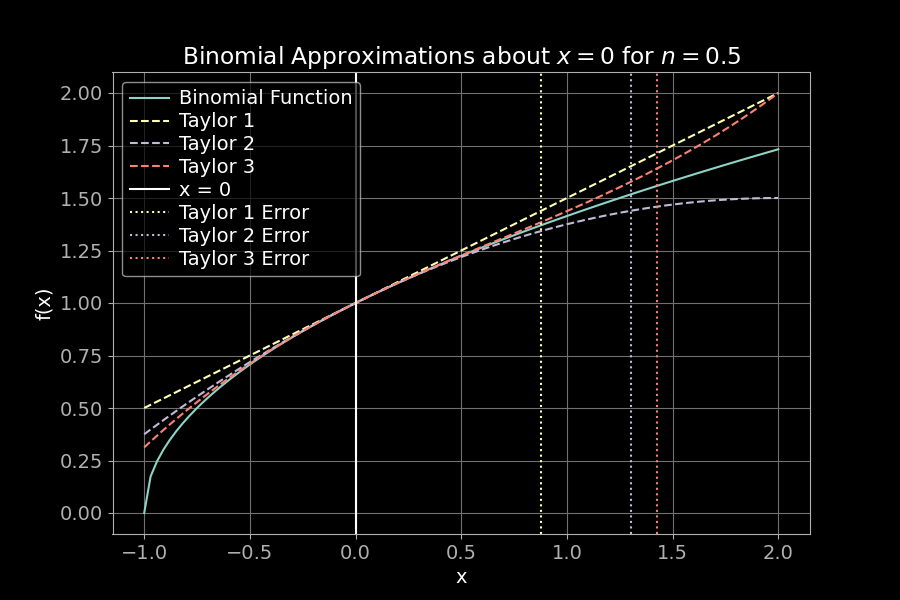

In [5]:
fig, s1 = plt.subplots(1)

s1.plot(xx, binom(xx, nn), label="Binomial Function")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")
s1.plot(xx, taylor3, ls="--", label="Taylor 3")

s1.axvline(x=0, label=f"x = 0")

for ii, xx_error in enumerate(xx_errors):
    s1.axvline(x=xx_error, color=f"C{ii+1}",ls=":", label=f"Taylor {ii+1} Error")

s1.set_title("Binomial Approximations about $x = 0$ for $n ="+ f"{nn}" +"$")
s1.set_xlabel("x")
s1.set_ylabel("f(x)")
s1.legend()
s1.grid()
plt.show()

# <span style="color: #ff5500">Question 2: Sine and Cosine Approximations</a>

## Question 2A: Sine 
Repeat the Taylor Expansion approximations for sine  to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.

## Question 2B: Cosine
Repeat the Taylor Expansion approximations for cosine to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.


## Q 2A Solution

$$f(0) = 0, f'(0) = cos(0) = 1, f''(0) = -sin(0) = 0, f'''(0) = -cos(0) = -1$$

so $$f(x)\Bigr|_{x \rightarrow 0} &\approx x-\frac{x^3}{6}$$

the second order expansion is simply  $$f(x)\Bigr|_{x \rightarrow 0} &\approx x$$

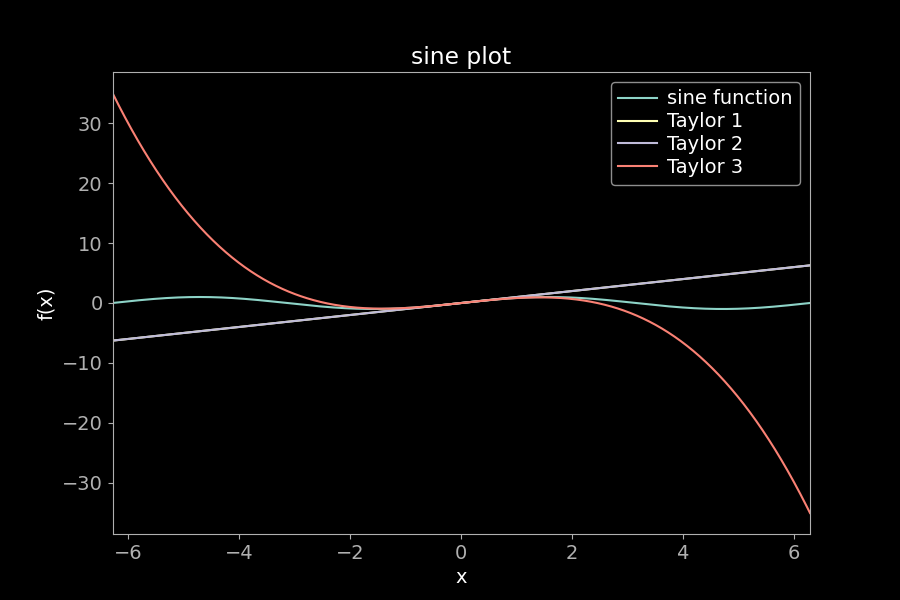

In [6]:
pi = np.pi
fig2, s2 = plt.subplots(1)

def sine(x):
    return np.sin(x)
def cosine(x):
    return np.cos(x)

func = sine


xs = np.linspace(-2*pi,2*pi,1000)
zeroth=0
first= xs
second= first
third= second + (-1.0/6.0)*xs**3

s2.plot(xs,func(xs),label ='sine function')
s2.plot(xs,first,label ='Taylor 1')
s2.plot(xs,second,label ='Taylor 2')
s2.plot(xs,third,label ='Taylor 3')
s2.legend()
s2.set_title('sine plot')
s2.set_ylabel('f(x)')
s2.set_xlabel('x')
s2.set_xlim(min(xs),max(xs))
plt.show()

##Q 2b Solution 

$$f(x) = cos(x)$$

so $$f(0) = 1, f'(0) = -sin(0) = 0, f''(0) = -cos(0) = -1$$

therefore $$f(x)\Bigr|_{x \rightarrow 0} &\approx 1-\frac{x^2}{2}$$

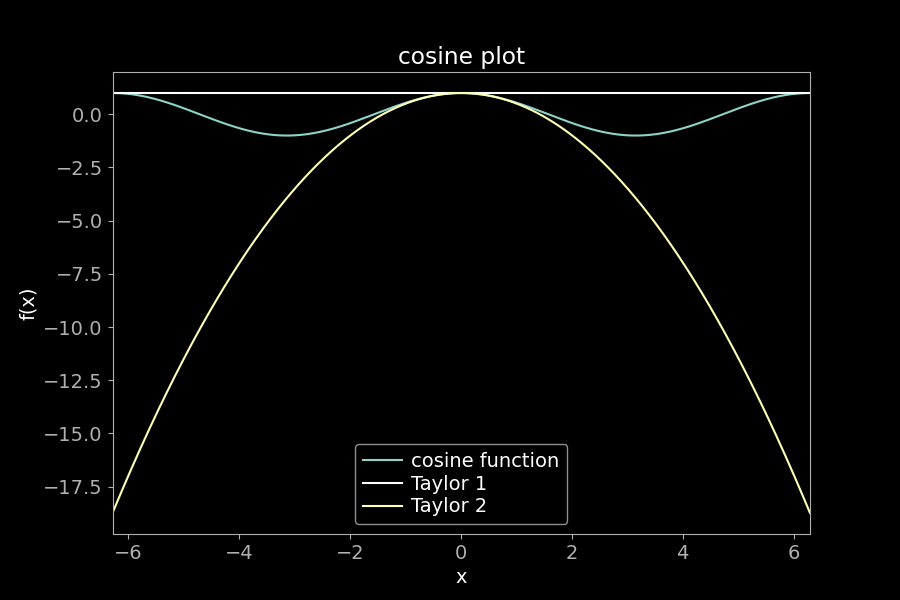

In [7]:
fig2, s3 = plt.subplots(1)

func =cosine

xs = np.linspace(-2*pi,2*pi,1000)
zeroth=1
first= zeroth
second= first - 0.5*(xs**2)
third= second 

s3.plot(xs,func(xs),label ='cosine function')
s3.axhline(first,label ='Taylor 1')
s3.plot(xs,second,label ='Taylor 2')
#s3.plot(xs,third,label ='Taylor 3')
s3.legend()
s3.set_title('cosine plot')
s3.set_ylabel('f(x)')
s3.set_xlabel('x')
s3.set_xlim(min(xs),max(xs))
plt.show()

# <span style="color: #ff5500">Question 3: Complex Number Review</a>

## Question 3A:
Plot the following complex function on a domain of $\phi \in [0, 2 \pi]$:
\begin{align}
z_1(\phi) &= 2 + e^{i \phi}\\
z_2(\phi) &= \dfrac{3}{2 - e^{i \phi}}\\
z_3(\phi) &= e^{(\sigma + i \omega) t}
\end{align}
where for $z_4$, $\sigma = -0.5$, and $\omega = 1$.

## Question 3B:
Calculate the magnitude $r(\phi)$ and argument $\theta(\phi)$ for each $z_i$.

## Question 3C:
Calculate the velocity of the phasors with respect to $\phi$, and draw them for each $z_i$ evaluated at $\phi = \left\{0, \dfrac{\pi}{2}, \pi, \dfrac{3\pi}{2} \right\}$

## Question 3D:
What is the primary difference between $z_1$ and $z_2$?

## Question 3E:
For $z_3$, substitute $t$ for $\phi$, and calculate the normalized time derivatives : $\dfrac{\dot{z_3}}{z_3}$, $\dfrac{\ddot{z_3}}{z_3}$

and find expressions for the normalized real polar coordinates $\dfrac{\dot{r}}{r}, \dfrac{\ddot{r}}{r}, \dot{\theta}, \ddot{\theta}$.

Discuss how the expressions you found for the polar coordinates relate to the path you plotted for $z_3$ in part A.  

What happens if $\sigma = +0.5$?

<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_212756/2889977331.py:35: SyntaxWarning: invalid escape sequence '\p'
  s4.set_title('$z_{1}(\phi)$')


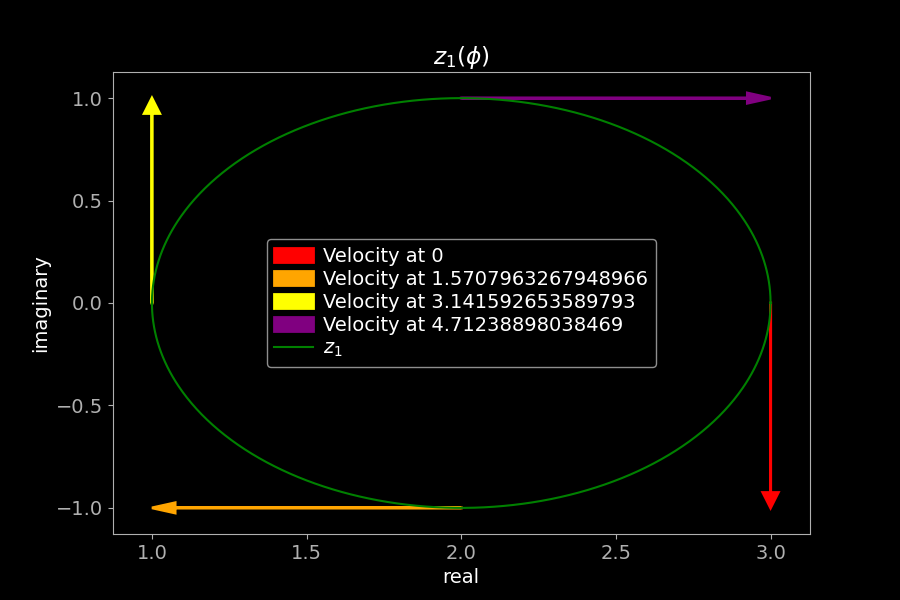

In [58]:
import sympy as sym
fig2, s4 = plt.subplots(1)
phi = np.linspace(0,2*pi,1000)
def z_1(x):
    return (2+np.cos(x))-np.sin(x)*1j

def z_2(x):
    return (3.0)/(2-np.cos(x)+np.sin(x)*1j)
def z_3(x):
    return np.power(euler,(-0.5+1j)*x)
def z_1_phasor(x):
    return -np.sin(x)-np.cos(x)*1j  
def z_2_phasor(x):
    return(3*(2-np.cos(x)+np.sin(x)*1j)**(-2)*(np.sin(x)+np.cos(x)*1j))
def z_3_phasor(x):
    return (-0.5+1j)*np.power(euler,(-0.5+1j)*x)
    
euler= np.e
set = [0,pi/2,pi,3*pi/2]
imaginary_test = 3+4j

colors=['red','orange','yellow','purple']

for k in range(len(set)):
    s4.arrow(z_1(set[k]).real,z_1(set[k]).imag, z_1_phasor(set[k]).real, z_1_phasor(set[k]).imag, shape='full',color=colors[k], lw=2, length_includes_head=True, head_width=.05, zorder=2, label="Velocity at "+str(set[k]))

s4.plot(z_1(phi).real,z_1(phi).imag,label='$z_{1}$',color='green')
#s4.plot(z_1(set).real,z_1(set).imag)

#s4.arrow(z_1(phi).real,z_1(phi).imag, z_1_phasor(phi).real, z_1_phasor(phi).imag, shape='full', color="blue", lw=2, length_includes_head=True, head_width=.15, zorder=2, label="Velocity")
#s4.arrow(z_1(set).real,z_1(set).imag, z_1_phasor.real, z_1_phasor.imag, shape='full', color="blue", label="Velocity")
#s4.plot(z_2.real,z_2.imag,label='$z_{2}$',color='blue')
#s4.plot(z_3.real,z_3.imag,label='$z_{3}$',color='red')

s4.set_title('$z_{1}(\phi)$')
s4.set_ylabel('imaginary')
s4.set_xlabel('real')
s4.legend()

plt.show()


### Derivation for $Z_{1}$

$r_{1}(\phi) = \sqrt{|z_{1}(\phi)|^2} = \sqrt{4+2(e^{i\phi}+e^{-i\phi}+e^{-i\phi+i\phi})}$

$r_{1}(\phi) =\sqrt{5+4cos(\phi)}$

and since $z_{1}$ can be rewritten

$z_{1}(\phi) = 2+cos(\phi)+isin(\phi)$

then

$\theta_{1}(\phi) = arctan2(2+cos(\phi),sin(\phi))$

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_212756/4135279534.py:9: SyntaxWarning: invalid escape sequence '\p'
  s5.set_title('$z_{2}(\phi)$')


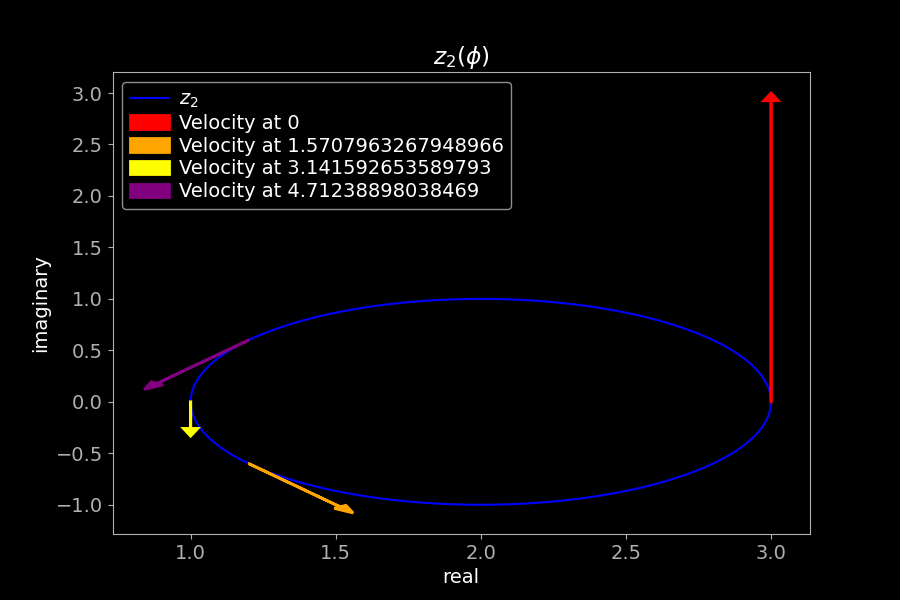

In [55]:
fig2, s5 = plt.subplots(1)
s5.plot(z_2(phi).real,z_2(phi).imag,label='$z_{2}$',color='green')

for k in range(len(set)):
    s5.arrow(z_2(set[k]).real,z_2(set[k]).imag, z_2_phasor(set[k]).real, z_2_phasor(set[k]).imag, shape='full',color=colors[k], lw=2, length_includes_head=True, head_width=.05, zorder=2, label="Velocity at "+str(set[k]))



s5.set_title('$z_{2}(\phi)$')
s5.set_ylabel('imaginary')
s5.set_xlabel('real')
s5.legend()

plt.show()

### Derivation for $Z_{2}$

$r_{2}(\phi) = \sqrt{|z_{2}(\phi)|^2} = \sqrt{(\frac{3}{2-e^{i\phi}})(\frac{3}{2-e^{-i\phi}})}$

$r_{2}(\phi) =\sqrt{\frac{9}{5-4cos(\phi)}}$

and since z2 can be rewritten

$z_{2}(\phi) = 2+cos(\phi)+isin(\phi)$

then

$\theta_{2}(\phi) = arctan2(2+cos(\phi),sin(\phi))$

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_212756/2187532572.py:8: SyntaxWarning: invalid escape sequence '\p'
  s6.set_title('$z_{3}(\phi)$')


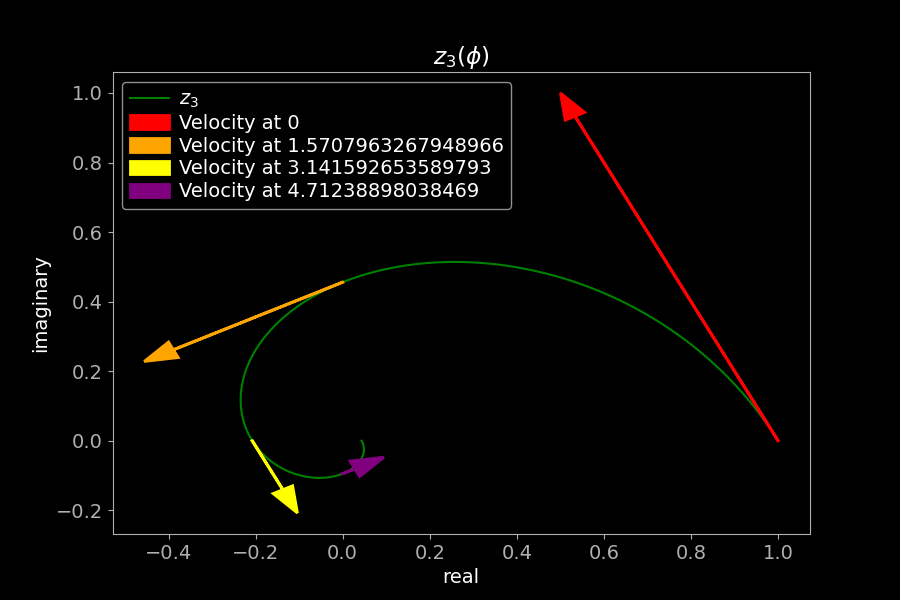

In [57]:
fig2, s6 = plt.subplots(1)
s6.plot(z_3(phi).real,z_3(phi).imag,label='$z_{3}$',color='green')

for k in range(len(set)):
    s6.arrow(z_3(set[k]).real,z_3(set[k]).imag, z_3_phasor(set[k]).real, z_3_phasor(set[k]).imag, shape='full',color=colors[k], lw=2, length_includes_head=True, head_width=.05, zorder=2, label="Velocity at "+str(set[k]))


s6.set_title('$z_{3}(\phi)$')
s6.set_ylabel('imaginary')
s6.set_xlabel('real')
s6.legend()

plt.show()

### Derivation for $Z_{3}$

$r_{3}(\phi) = \sqrt{|z_{3}(\phi)|^2} = \sqrt{(e^{\sigma\phi}e^{i\omega\phi})(e^{\sigma\phi}e^{-i\omega\phi})}$

$r_{3}(\phi) =\sqrt{e^{0}e^{2\sigma\phi}}=e^{\sigma\phi}$

and since z3 can be rewritten

$z_{3}(\phi) = e^{(\sigma+i\omega)\phi} = e^{\sigma\phi}e^{i\omega\phi}$

then from the form $r(\phi)e^{i\theta(\phi)}$

$\theta_{3}(\phi) = \omega\phi$

### 3D

The primary difference between $z_{1}$ and $z_{2}$ is that $z_1$ rotates at a constant rate while $z_2$ does not.

### 3E

from previous answers in the case of $z_{3}$

$r(t) = \sigma t$ and $\theta(t) = \omega t$

so

$\dot{r} = \sigma e^{\sigma t}, \ddot{r} = \sigma^{2}e^{\sigma t}, \dot{\theta} = \omega, \ddot{\theta} = 0$

since $\frac{\dot{z}}{z} = \frac{\dot{r}}{r} + i\theta$ and $\frac{\ddot{z}}{z}=\frac{\ddot{r}}{r}-\dot{\theta}^2+i\ddot{\theta}+\frac{2i\dot{\theta}\dot{r}}{r}$

which leads to $\frac{\dot{r}}{r} = \sigma, \frac{\ddot{r}}{r} = \sigma^2$

thus $\frac{\dot{z}}{z} = \sigma+i\omega$ and $\frac{\ddot{z}}{z} = \sigma^2-\omega^2+2\omega\sigma i = (\sigma+i\omega)^2$

# <span style="color: #ff5500">Question 4: Electric field propogating in 2D</a>
In class, we assumed that an plane wave was propogating in the $\hat{k} = \hat{z}$ direction, with the electric field oscillating in the $\hat{x}$ direction.\
Suppose now that the is oscillating in the $\dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})$ direction: 
\begin{align}
\boldsymbol{E} = E_0 \cos(\vec{k} \cdot \vec{r} - \omega t) \dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})
\end{align}

## Question 4A:
What direction of propogation $\hat{k}$ and magnetic field vector $\boldsymbol{B}$ are now possible?\
Draw a diagram of the electric field vector and the plane of propogation.

## Question 4B:
What are the expressions for $\hat{k}$ and $\boldsymbol{B}$ if we constrain the direction of propogating to be (partially) in the positive $\hat{x}$ direction? 

## Answer 4A 

since the elctric field is oscillating in $\frac{1}{\sqrt{2}} (\hat{x}+\hat{y})$ then the b field and k field can be in either the $\pm\hat{z}$, the $\frac{1}{\sqrt{2}} (\hat{x}-\hat{y})$, or the $\frac{1}{\sqrt{2}} (-\hat{x}+\hat{y})$ directions

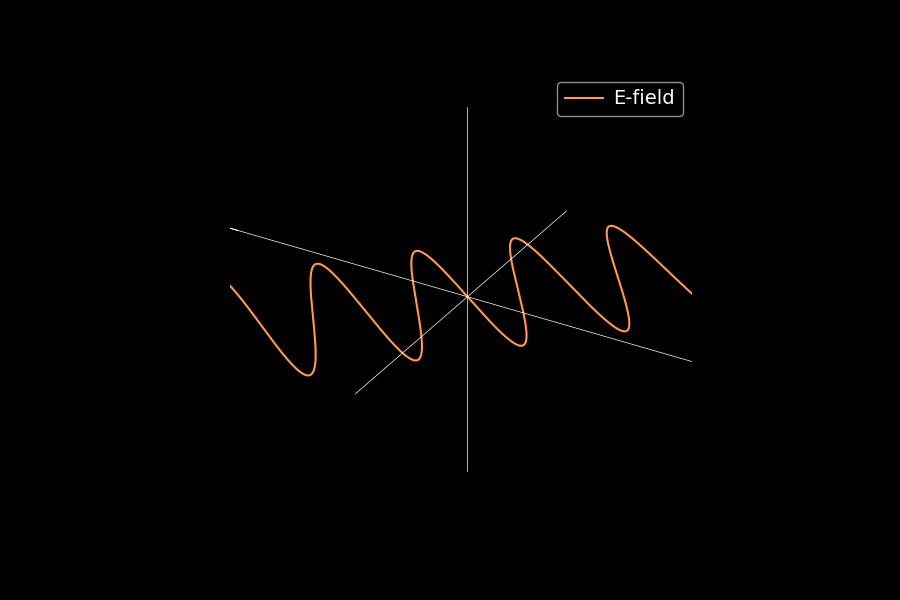

In [73]:
# drawing code

#| label: fig:three_d_wave
#| "tags": [ "hide-input",]
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(projection='3d')
rot = pi/4
amp = 1
kk = 2 * np.pi * 1
omega = 2 * np.pi * 1
time = 0 
x_original = np.linspace(-2.5, 2.5, 1000)
y_original = amp * np.sin(omega * time - kk * x_original)

x = np.cos(rot)*x_original - np.sin(rot)*y_original
y = np.sin(rot)*x_original + np.cos(rot)*y_original
z = np.zeros_like(x)

eline, = ax_3d.plot(x, y, z, color="#ff9955", label="E-field")
#bline, = ax_3d.plot(x, y, z, color="#5599ff", label="B-field")

ax_3d.plot(1.5*x, z, z, lw=0.5, color="white")
ax_3d.plot(z, np.linspace(-2*amp, 2*amp, len(z)), z, lw=0.5, color="white")
ax_3d.plot(z, z, np.linspace(-2*amp, 2*amp, len(z)), lw=0.5, color="white")

ax_3d.set_xlim([x[0], x[-1]])
ax_3d.set_ylim([-1, 1])
ax_3d.set_zlim([-1, 1])
ax_3d.set_aspect('equal')
ax_3d.legend()
ax_3d.set_axis_off()
plt.show()

## Answer 4B

If we constrain the direction of propagation to be in the positive $\hat{x}$ direction then $\hat{k} = \frac{1}{\sqrt{2}} (\hat{x}-\hat{y})$ and $\boldsymbol{B} = \frac{E_0}{c} \cos(\vec{k} \cdot \vec{r} - \omega t)\hat{z}$

# <span style="color: #ff5500">Question 5: Spherical Plane Wave Intensity and Radiation Pressure</a>

Suppose you have a sinusoidal spherical plane wave source a distance $d$ away along the $\hat{z}$ axis from a cylindrical mirror with radius $a$.\
Use the center of the spherical wave as the origin, and the distance from that center as the variable $r$.\
Assume that the cylinder is in the $xy$ plane.\
Also assume that the spherical wave is emitting total power $P_\mathrm{total}$ in all directions.


## Question 5A:
What is the Poynting vector $\boldsymbol{S}$ for the spherical waves?\
*Hint: Equation 9.49 of Griffith's E&M may be helpful here*

## Question 5B:
What is the Poynting vector $\boldsymbol{S}$ incident on the mirror center?\
What about the mirror edge?\
Write an expression for the Poynting vector incident anywhere on the mirror's surface.

## Question 5C:
Using your result from Question 5B, find the intensity $I$ incident on the mirror.

## Question 5D:
Find the total power $P$ incident on the mirror.\
Compare to the total power emitted by the spherical plane wave.

## Question 5E: 
Calculate the radiation pressure $p_\mathrm{rad}$ incident on the mirror.\
Also find the radiation pressure force $F_\mathrm{rad}$.\
Assume the mirror is a perfect reflector.\
If the mirror has a mass $m$, what is its acceleration?

## Answer 5A

The Poynting vector is in the $\hat{r}$ and the units of a poynting vector are $\frac{watts}{m^2}$ so $\boldsymbol{\vec{S}} = \frac{P_{total}}{4\pi r^2}\hat{r}$

## Answer 5B

At the center of the mirror $r = d$ so $\boldsymbol{\vec{S}} = \frac{P_{total}}{4\pi a^2}\hat{z}$ and at the edge of the mirror $\boldsymbol{\vec{S}} = \frac{P_{total}}{4\pi (a^2+d^2)}\hat{r}$ where $r = \sqrt{a^2+d^2}$ and $\hat{r} = \frac{acos(\phi)}{\sqrt{a^2+d^2}}\hat{x}+\frac{asin(\phi)}{\sqrt{a^2+d^2}}\hat{y}+\frac{d}{\sqrt{a^2+d^2}}\hat{z}$ where $\phi$ can range from 0 to $2\pi$

for anywhere on the mirror $\boldsymbol{\vec{S}} = \frac{P_{total}}{4\pi (x^2+d^2)}\hat{r}$ where $\hat{r}  = \frac{xcos(\phi)}{\sqrt{x^2+d^2}}\hat{x}+\frac{xsin(\phi)}{\sqrt{x^2+d^2}}\hat{y}+\frac{d}{\sqrt{x^2+d^2}}\hat{z}$ and x ranges from 0 to a and $\phi$ ranges from 0 to $2\pi$

## Answer 5C

For a single poynting vector

$I = \frac{1}{T}\int_{0}^{T} \frac{P_{total}}{4\pi (x^2+d^2)} dt$  which since power should change over time proportional to $cos(t)^2$ and we are integrating over a full oscillation then $I = \frac{P_{total}}{8\pi (x^2+d^2)}$ To find the total intensity you need to average over the area of the mirror so $I_{total} = \frac{P_{total}}{8a^2\pi^2} \int_{0}^{2\pi}\int_{0}^{a} \frac{x}{x^2+d^2}dxd\phi = \frac{P_{total}}{8a^2\pi} ln(1+\frac{a^2}{d^2})$ 

## Answer 5D 

to get to power simply multiply intensity by the area of the mirror to get $P_{mirror} = \frac{P_{total}}{8} ln(1+\frac{a^2}{d^2})$ which is much less than the power emitted by the wave.

## Answer 5E

$p_{rad} = \frac{I_{mirror} cos(\theta)}{c}  = \frac{I_{mirror}}{c}$ since the $cos(\theta)$ term is accounted for in the $I_{mirror}$ calculation $F_{rad} = \frac{2P_{mirror}}{c}$ where the factor of two comes from the mirror being a perfect reflector. This leads to the acceleration being

$a_{mirror} = \frac{2P_{mirror}}{mc}$